<a href="https://colab.research.google.com/github/Christoputhanpurackal/position_salary-using-linear-regression/blob/main/linearregressionminiproject_positionsalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

# Read the CSV file with 'latin1' encoding
data = pd.read_csv("/content/position_salary.csv", encoding='latin1')

data.head()


,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education           3391 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB


In [ ]:
data.describe()

,Experience (Years),Salary
count,3467.000000,3.467000e+03
mean,16.639746,1.487459e+06
std,6.935259,5.776934e+05
min,5.000000,5.026890e+05
25%,11.000000,9.818155e+05
50%,17.000000,1.475343e+06
75%,23.000000,1.985568e+06
max,28.000000,2.499925e+06


In [ ]:
data.nunique()

,0
Position,808
Location,88
Gender,2
Education,20
Experience (Years),24
Salary,3465


In [ ]:
data.shape

(3467, 6)

In [ ]:
data.isnull().sum()

,0
Position,19
Location,0
Gender,24
Education,76
Experience (Years),0
Salary,0


In [ ]:
data['Position'] = data['Position'].fillna(data['Position'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data.isnull().sum()

,0
Position,0
Location,0
Gender,0
Education,0
Experience (Years),0
Salary,0


In [ ]:
# Explore Data Characteristics

print("Unique position:", data['Position'].nunique())
print("Unique Education:", data['Education'].unique())

Unique position: 808
Unique Education: ['B.Tech/B.E.' 'BCA' 'B.A' 'B.Com' 'Diploma' 'B.Sc' 'B.B.A/ B.M.S'
 'Not Pursuing Graduation' 'BJMC' 'course on computer concepts' 'B.Des.'
 'LLB' 'BBA' 'BTECH' 'HSC' 'bachelor of arts' 'B.PHARMACY' 'B.Pharma'
 'BBM' 'Mtech']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3467 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3467 non-null   object
 3   Education           3467 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


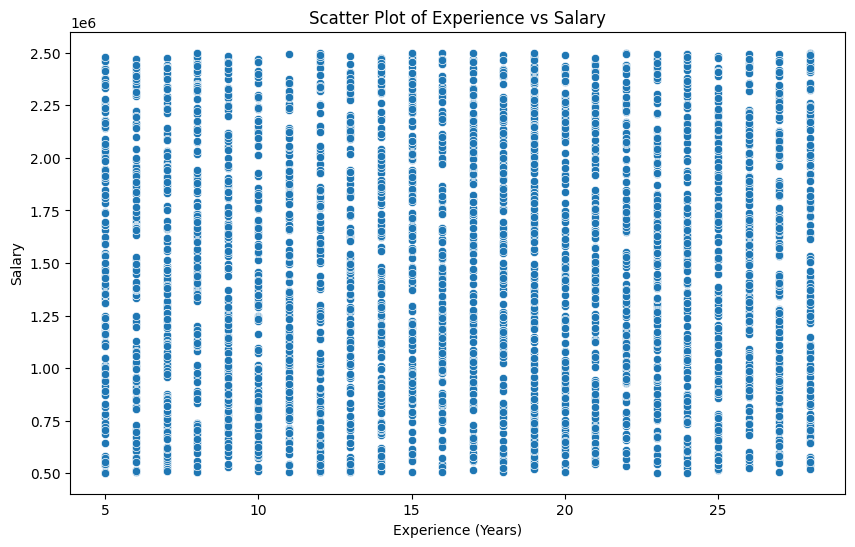

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience (Years)', y='Salary', data=data)
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()


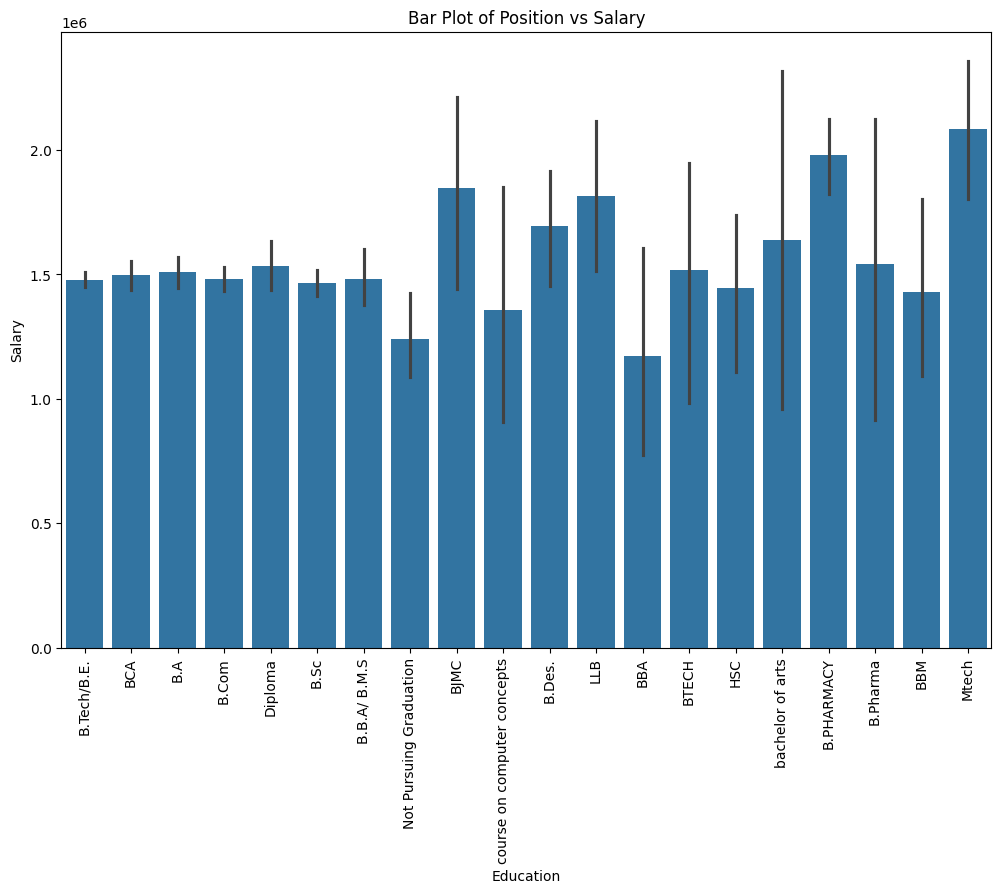

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Salary', data=data)
plt.title('Bar Plot of Position vs Salary')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Position', 'Gender', 'Education','Location']

# Apply label encoding to the columns
for column in columns_to_encode:
    data[column] = LabelEncoder().fit_transform(data[column])

# Fill NaN values in categorical columns with the most frequent value
for column in columns_to_encode:
    data[column] = data[column].fillna(data[column].mode()[0])


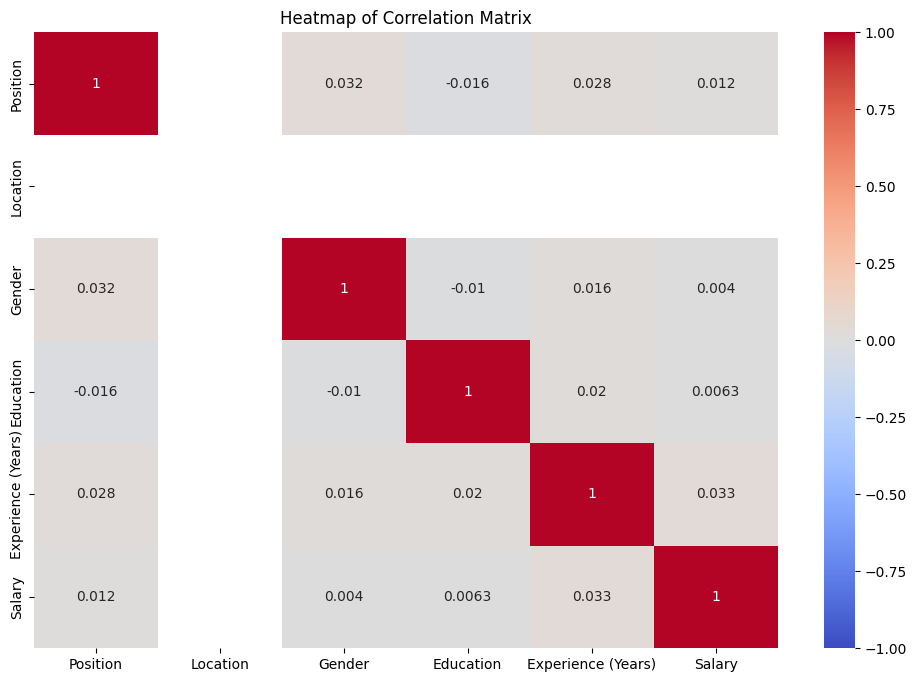

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()



In [ ]:

# Define the columns to analyze
columns_to_check = ['Experience (Years)', 'Salary']

# Calculate IQR for each column
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)]



In [ ]:
# Filter out the outliers
data_cleaned = data[(data[columns_to_check] >= lower_bound) & (data[columns_to_check] <= upper_bound)].dropna()


In [ ]:
# Cap or floor the outliers
# Replace outliers with mean or median value
data_imputed = data.copy()
data_imputed['Experience (Years)'] = np.where((data_imputed['Experience (Years)'] < lower_bound['Experience (Years)']) | (data_imputed['Experience (Years)'] > upper_bound['Experience (Years)']),
                                               data_imputed['Experience (Years)'].median(), data_imputed['Experience (Years)'])
data_imputed['Salary'] = np.where((data_imputed['Salary'] < lower_bound['Salary']) | (data_imputed['Salary'] > upper_bound['Salary']),
                                   data_imputed['Salary'].median(), data_imputed['Salary'])



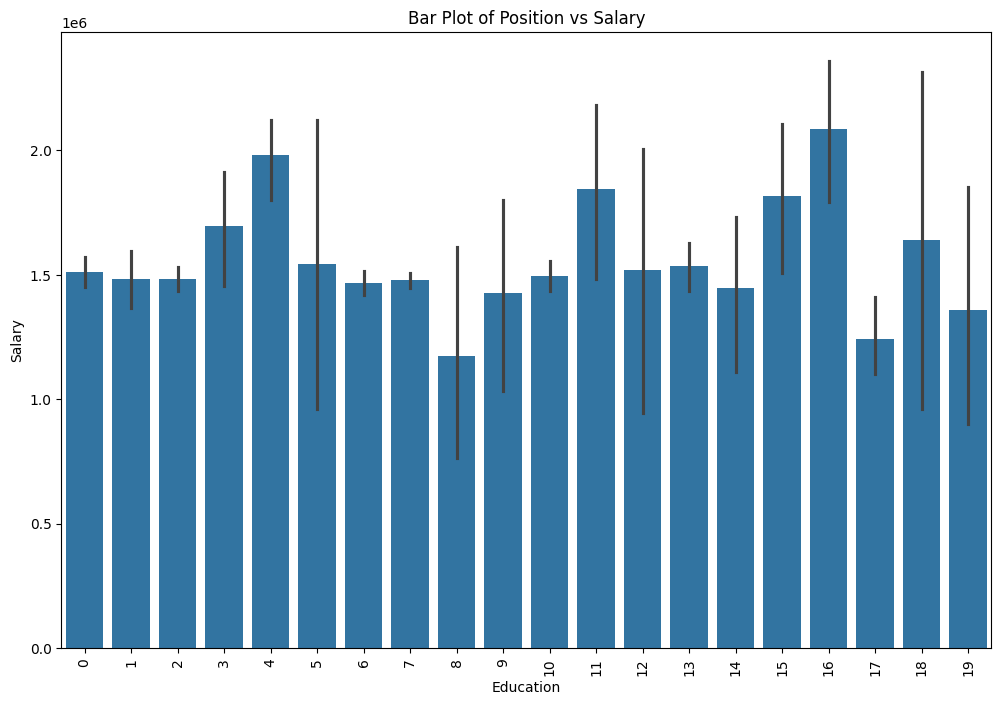

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Salary', data=data)
plt.title('Bar Plot of Position vs Salary')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

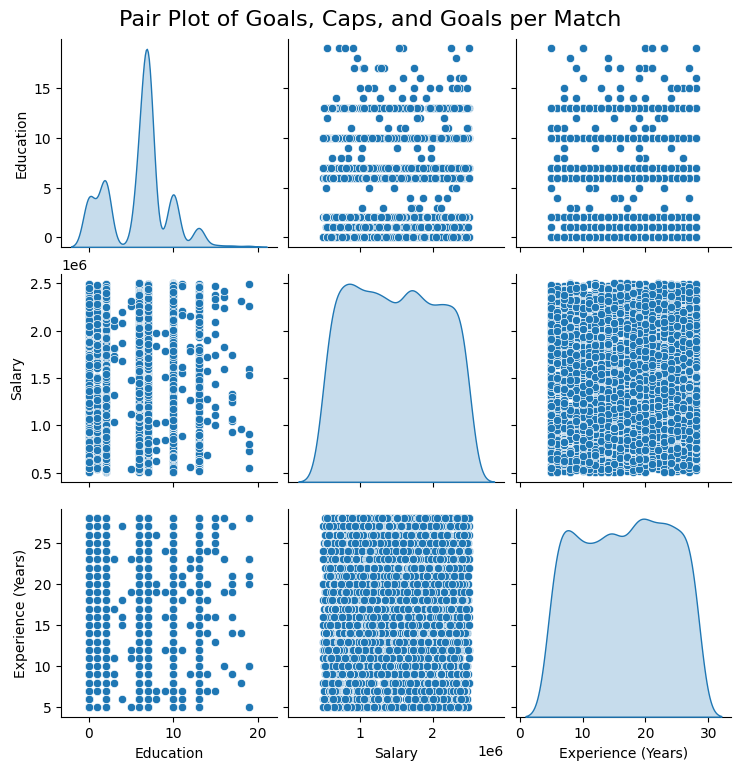

In [ ]:
# Pair Plot

sns.pairplot(data, vars=['Education','Salary','Experience (Years)'], palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Goals, Caps, and Goals per Match', y=1.02, fontsize=16)
plt.show()

Regression analysis

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define the feature matrix (X) and target vector (y)
X = data[['Experience (Years)']]  # Independent variables
y = data['Salary']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
columns_to_encode = ['Position', 'Gender', 'Education']
for column in columns_to_encode:
    data[column] = LabelEncoder().fit_transform(data[column])

# Fill NaN values with column median
data = data.fillna(data.median())


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 315571283931.3864
R-squared: 0.001956474065730185


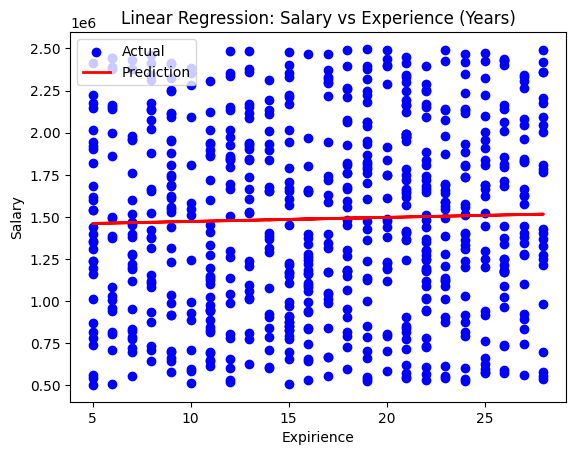

In [ ]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Salary vs Experience (Years)')
plt.xlabel('Expirience')
plt.ylabel('Salary')
plt.legend()
plt.show()
